In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as slb
import warnings
warnings.filterwarnings('ignore')


In [2]:
import plotly.express as px
import plotly.graph_objects as po
import nbformat

In [3]:
pd.set_option('display.max_columns',None)

In [4]:
df=pd.read_csv(r'D:\Ducat\dataset\Weather_india\IndianWeatherRepository.csv')
df.head()

,country,location_name,region,latitude,longitude,timezone,last_updated_epoch,last_updated,temperature_celsius,temperature_fahrenheit,condition_text,wind_mph,wind_kph,wind_degree,wind_direction,pressure_mb,pressure_in,precip_mm,precip_in,humidity,cloud,feels_like_celsius,feels_like_fahrenheit,visibility_km,visibility_miles,uv_index,gust_mph,gust_kph,air_quality_Carbon_Monoxide,air_quality_Ozone,air_quality_Nitrogen_dioxide,air_quality_Sulphur_dioxide,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,sunrise,sunset,moonrise,moonset,moon_phase,moon_illumination
0,India,Ashoknagar,Madhya Pradesh,24.57,77.72,Asia/Kolkata,1693286100,29-08-2023 10:45,27.5,81.5,Partly cloudy,12.8,20.5,281,WNW,1008,29.77,0.0,0.0,67,26,29.7,85.5,10.0,6,7,14.8,23.8,243.7,45.8,1.7,3.1,12.6,18.5,1,2,5:59 AM,6:41 PM,5:42 PM,3:38 AM,Waxing Gibbous,93
1,India,Raisen,Madhya Pradesh,23.33,77.80,Asia/Kolkata,1693286100,29-08-2023 10:45,27.5,81.5,Sunny,9.6,15.5,287,WNW,1008,29.78,0.0,0.0,70,19,30.0,86.0,10.0,6,7,11.2,18.0,240.3,38.3,2.1,2.6,10.7,14.2,1,1,6:00 AM,6:40 PM,5:39 PM,3:41 AM,Waxing Gibbous,93
2,India,Chhindwara,Madhya Pradesh,22.07,78.93,Asia/Kolkata,1693286100,29-08-2023 10:45,26.3,79.3,Partly cloudy,11.4,18.4,317,NW,1009,29.78,0.0,0.0,70,51,28.2,82.8,10.0,6,7,13.2,21.2,220.3,57.2,0.6,1.7,16.8,20.7,2,2,5:56 AM,6:34 PM,5:32 PM,3:39 AM,Waxing Gibbous,93
3,India,Betul,Madhya Pradesh,21.86,77.93,Asia/Kolkata,1693286100,29-08-2023 10:45,25.6,78.1,Cloudy,10.5,16.9,297,WNW,1009,29.80,0.0,0.0,76,65,27.6,81.7,10.0,6,6,13.0,20.9,200.3,25.0,1.2,1.1,4.9,6.6,1,1,6:00 AM,6:38 PM,5:36 PM,3:43 AM,Waxing Gibbous,93
4,India,Hoshangabad,Madhya Pradesh,22.75,77.72,Asia/Kolkata,1693286100,29-08-2023 10:45,27.2,81.0,Cloudy,10.1,16.2,274,W,1009,29.79,0.0,0.0,74,82,29.9,85.8,10.0,6,6,11.6,18.7,257.0,30.8,2.2,1.8,11.4,14.8,1,1,6:01 AM,6:39 PM,5:38 PM,3:42 AM,Waxing Gibbous,93


In [5]:
df.shape

(2736, 42)

In [8]:
df.isnull().sum()

country                         0
location_name                   0
region                          0
latitude                        0
longitude                       0
timezone                        0
last_updated_epoch              0
last_updated                    0
temperature_celsius             0
temperature_fahrenheit          0
condition_text                  0
wind_mph                        0
wind_kph                        0
wind_degree                     0
wind_direction                  0
pressure_mb                     0
pressure_in                     0
precip_mm                       0
precip_in                       0
humidity                        0
cloud                           0
feels_like_celsius              0
feels_like_fahrenheit           0
visibility_km                   0
visibility_miles                0
uv_index                        0
gust_mph                        0
gust_kph                        0
air_quality_Carbon_Monoxide     0
air_quality_Oz

In [6]:
df.columns

Index(['country', 'location_name', 'region', 'latitude', 'longitude',
       'timezone', 'last_updated_epoch', 'last_updated', 'temperature_celsius',
       'temperature_fahrenheit', 'condition_text', 'wind_mph', 'wind_kph',
       'wind_degree', 'wind_direction', 'pressure_mb', 'pressure_in',
       'precip_mm', 'precip_in', 'humidity', 'cloud', 'feels_like_celsius',
       'feels_like_fahrenheit', 'visibility_km', 'visibility_miles',
       'uv_index', 'gust_mph', 'gust_kph', 'air_quality_Carbon_Monoxide',
       'air_quality_Ozone', 'air_quality_Nitrogen_dioxide',
       'air_quality_Sulphur_dioxide', 'air_quality_PM2.5', 'air_quality_PM10',
       'air_quality_us-epa-index', 'air_quality_gb-defra-index', 'sunrise',
       'sunset', 'moonrise', 'moonset', 'moon_phase', 'moon_illumination'],
      dtype='object')

### Location-wise temprature Heatmap
--------------------------------------------------------

In [31]:
fig1=px.density_mapbox(df,lat='latitude',lon='longitude',z='temperature_celsius',radius=10,title='Location wise Heatmap')
fig1.update_layout(mapbox_style='open-street-map',title=dict(text='Location wise Heatmap', font=dict(size=24, color='Black', family='NewFontFamily')),height=600)
fig1.show()

### Temprature Distribution
----------------------------------------------

In [8]:
fig2=px.histogram(df,x='temperature_celsius',nbins=20,title='Temprature Distribution',height=600)
fig2.update_traces(marker_color='skyblue', opacity=0.7, marker_line_color='black', marker_line_width=1)
fig2.update_xaxes(title_text='Temprature (°C)',
                  showline=True,
                  linewidth=1,
                  linecolor='black')
fig2.update_yaxes(title_text='Frequency',
                  showline=True,
                  linewidth=1,
                  linecolor='black')
fig2.show()

### Wind Speed Vs Wind direction
---------------------------------------------------------

In [32]:
fig3=px.scatter_polar(df,r='wind_mph',theta='wind_direction',height=600)
fig3.update_layout(title=dict(text='Wind Speed and Direction',font=dict(size=20)))
fig3.show()

### Humidity and Cloud Cover
-----------------------------------------------------------------

In [33]:
df.columns

Index(['country', 'location_name', 'region', 'latitude', 'longitude',
       'timezone', 'last_updated_epoch', 'last_updated', 'temperature_celsius',
       'temperature_fahrenheit', 'condition_text', 'wind_mph', 'wind_kph',
       'wind_degree', 'wind_direction', 'pressure_mb', 'pressure_in',
       'precip_mm', 'precip_in', 'humidity', 'cloud', 'feels_like_celsius',
       'feels_like_fahrenheit', 'visibility_km', 'visibility_miles',
       'uv_index', 'gust_mph', 'gust_kph', 'air_quality_Carbon_Monoxide',
       'air_quality_Ozone', 'air_quality_Nitrogen_dioxide',
       'air_quality_Sulphur_dioxide', 'air_quality_PM2.5', 'air_quality_PM10',
       'air_quality_us-epa-index', 'air_quality_gb-defra-index', 'sunrise',
       'sunset', 'moonrise', 'moonset', 'moon_phase', 'moon_illumination'],
      dtype='object')

In [39]:
fig4=px.scatter(df,x='humidity',y='cloud',title='Humidity and Colud Cover',height=800)
fig4.update_xaxes(title='Humidity',
                  showline=True,
                  linewidth=1,
                  linecolor='black')
fig4.update_yaxes(title='Cloud',
                  showline=True,
                  linewidth=1,
                  linecolor='black')
                
fig4.show()

In [10]:
df.head(2)

,country,location_name,region,latitude,longitude,timezone,last_updated_epoch,last_updated,temperature_celsius,temperature_fahrenheit,condition_text,wind_mph,wind_kph,wind_degree,wind_direction,pressure_mb,pressure_in,precip_mm,precip_in,humidity,cloud,feels_like_celsius,feels_like_fahrenheit,visibility_km,visibility_miles,uv_index,gust_mph,gust_kph,air_quality_Carbon_Monoxide,air_quality_Ozone,air_quality_Nitrogen_dioxide,air_quality_Sulphur_dioxide,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,sunrise,sunset,moonrise,moonset,moon_phase,moon_illumination
0,India,Ashoknagar,Madhya Pradesh,24.57,77.72,Asia/Kolkata,1693286100,29-08-2023 10:45,27.5,81.5,Partly cloudy,12.8,20.5,281,WNW,1008,29.77,0.0,0.0,67,26,29.7,85.5,10.0,6,7,14.8,23.8,243.7,45.8,1.7,3.1,12.6,18.5,1,2,5:59 AM,6:41 PM,5:42 PM,3:38 AM,Waxing Gibbous,93
1,India,Raisen,Madhya Pradesh,23.33,77.80,Asia/Kolkata,1693286100,29-08-2023 10:45,27.5,81.5,Sunny,9.6,15.5,287,WNW,1008,29.78,0.0,0.0,70,19,30.0,86.0,10.0,6,7,11.2,18.0,240.3,38.3,2.1,2.6,10.7,14.2,1,1,6:00 AM,6:40 PM,5:39 PM,3:41 AM,Waxing Gibbous,93


### Location wise Air Quality Index Comaparison
----------------------------------------------------------------------------------

In [74]:
fig5=px.bar(df,x='location_name',y='air_quality_us-epa-index',title='Loationwise Air Quality Index Comparison',
            color="air_quality_us-epa-index",color_continuous_scale="Viridis",height=800)
fig5.update_xaxes(title='Location Name',
                  showline=True,
                  linewidth=1,
                  linecolor='Black')
fig5.update_yaxes(title='Air Quality EPA Index',
                  showline=True,
                  linewidth=1,
                  linecolor='Black')
fig5.show()

### Actual Temperature vs Feels Like
----------------------------------------------------------------------------------

In [52]:
fig6=px.scatter(df,x='temperature_celsius',y='feels_like_celsius',title='Comaprison between Actual temperature and Feels like temperature',height=600)
fig6.update_xaxes(title='Actual Temperature',
                  showline=True,
                  linewidth=1,
                  linecolor='Black')
fig6.update_yaxes(title='Feels Like Temperature',
                  showline=True,
                  linewidth=1,
                  linecolor='Black')
fig6.show()

### Sunrise Vs Sunset
---------------------------------

In [19]:
fig7=px.scatter(df,x='sunrise',y='sunset',title='Sunrise vs Sunset',height=600)
fig7.update_xaxes(title='Sunrise',
                  showline=True,
                  linewidth=1,
                  linecolor='Black')
fig7.update_yaxes(title='Sunset',
                  showline=True,
                  linewidth=1,
                  linecolor='Black')
fig7.show()

In [24]:
df.head(2)

,country,location_name,region,latitude,longitude,timezone,last_updated_epoch,last_updated,temperature_celsius,temperature_fahrenheit,condition_text,wind_mph,wind_kph,wind_degree,wind_direction,pressure_mb,pressure_in,precip_mm,precip_in,humidity,cloud,feels_like_celsius,feels_like_fahrenheit,visibility_km,visibility_miles,uv_index,gust_mph,gust_kph,air_quality_Carbon_Monoxide,air_quality_Ozone,air_quality_Nitrogen_dioxide,air_quality_Sulphur_dioxide,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,sunrise,sunset,moonrise,moonset,moon_phase,moon_illumination
0,India,Ashoknagar,Madhya Pradesh,24.57,77.72,Asia/Kolkata,1693286100,29-08-2023 10:45,27.5,81.5,Partly cloudy,12.8,20.5,281,WNW,1008,29.77,0.0,0.0,67,26,29.7,85.5,10.0,6,7,14.8,23.8,243.7,45.8,1.7,3.1,12.6,18.5,1,2,5:59 AM,6:41 PM,5:42 PM,3:38 AM,Waxing Gibbous,93
1,India,Raisen,Madhya Pradesh,23.33,77.80,Asia/Kolkata,1693286100,29-08-2023 10:45,27.5,81.5,Sunny,9.6,15.5,287,WNW,1008,29.78,0.0,0.0,70,19,30.0,86.0,10.0,6,7,11.2,18.0,240.3,38.3,2.1,2.6,10.7,14.2,1,1,6:00 AM,6:40 PM,5:39 PM,3:41 AM,Waxing Gibbous,93


### Correlation between Precipitation and Air Quality Index
-----------------------------------------------------------

<Figure size 1200x1000 with 0 Axes>

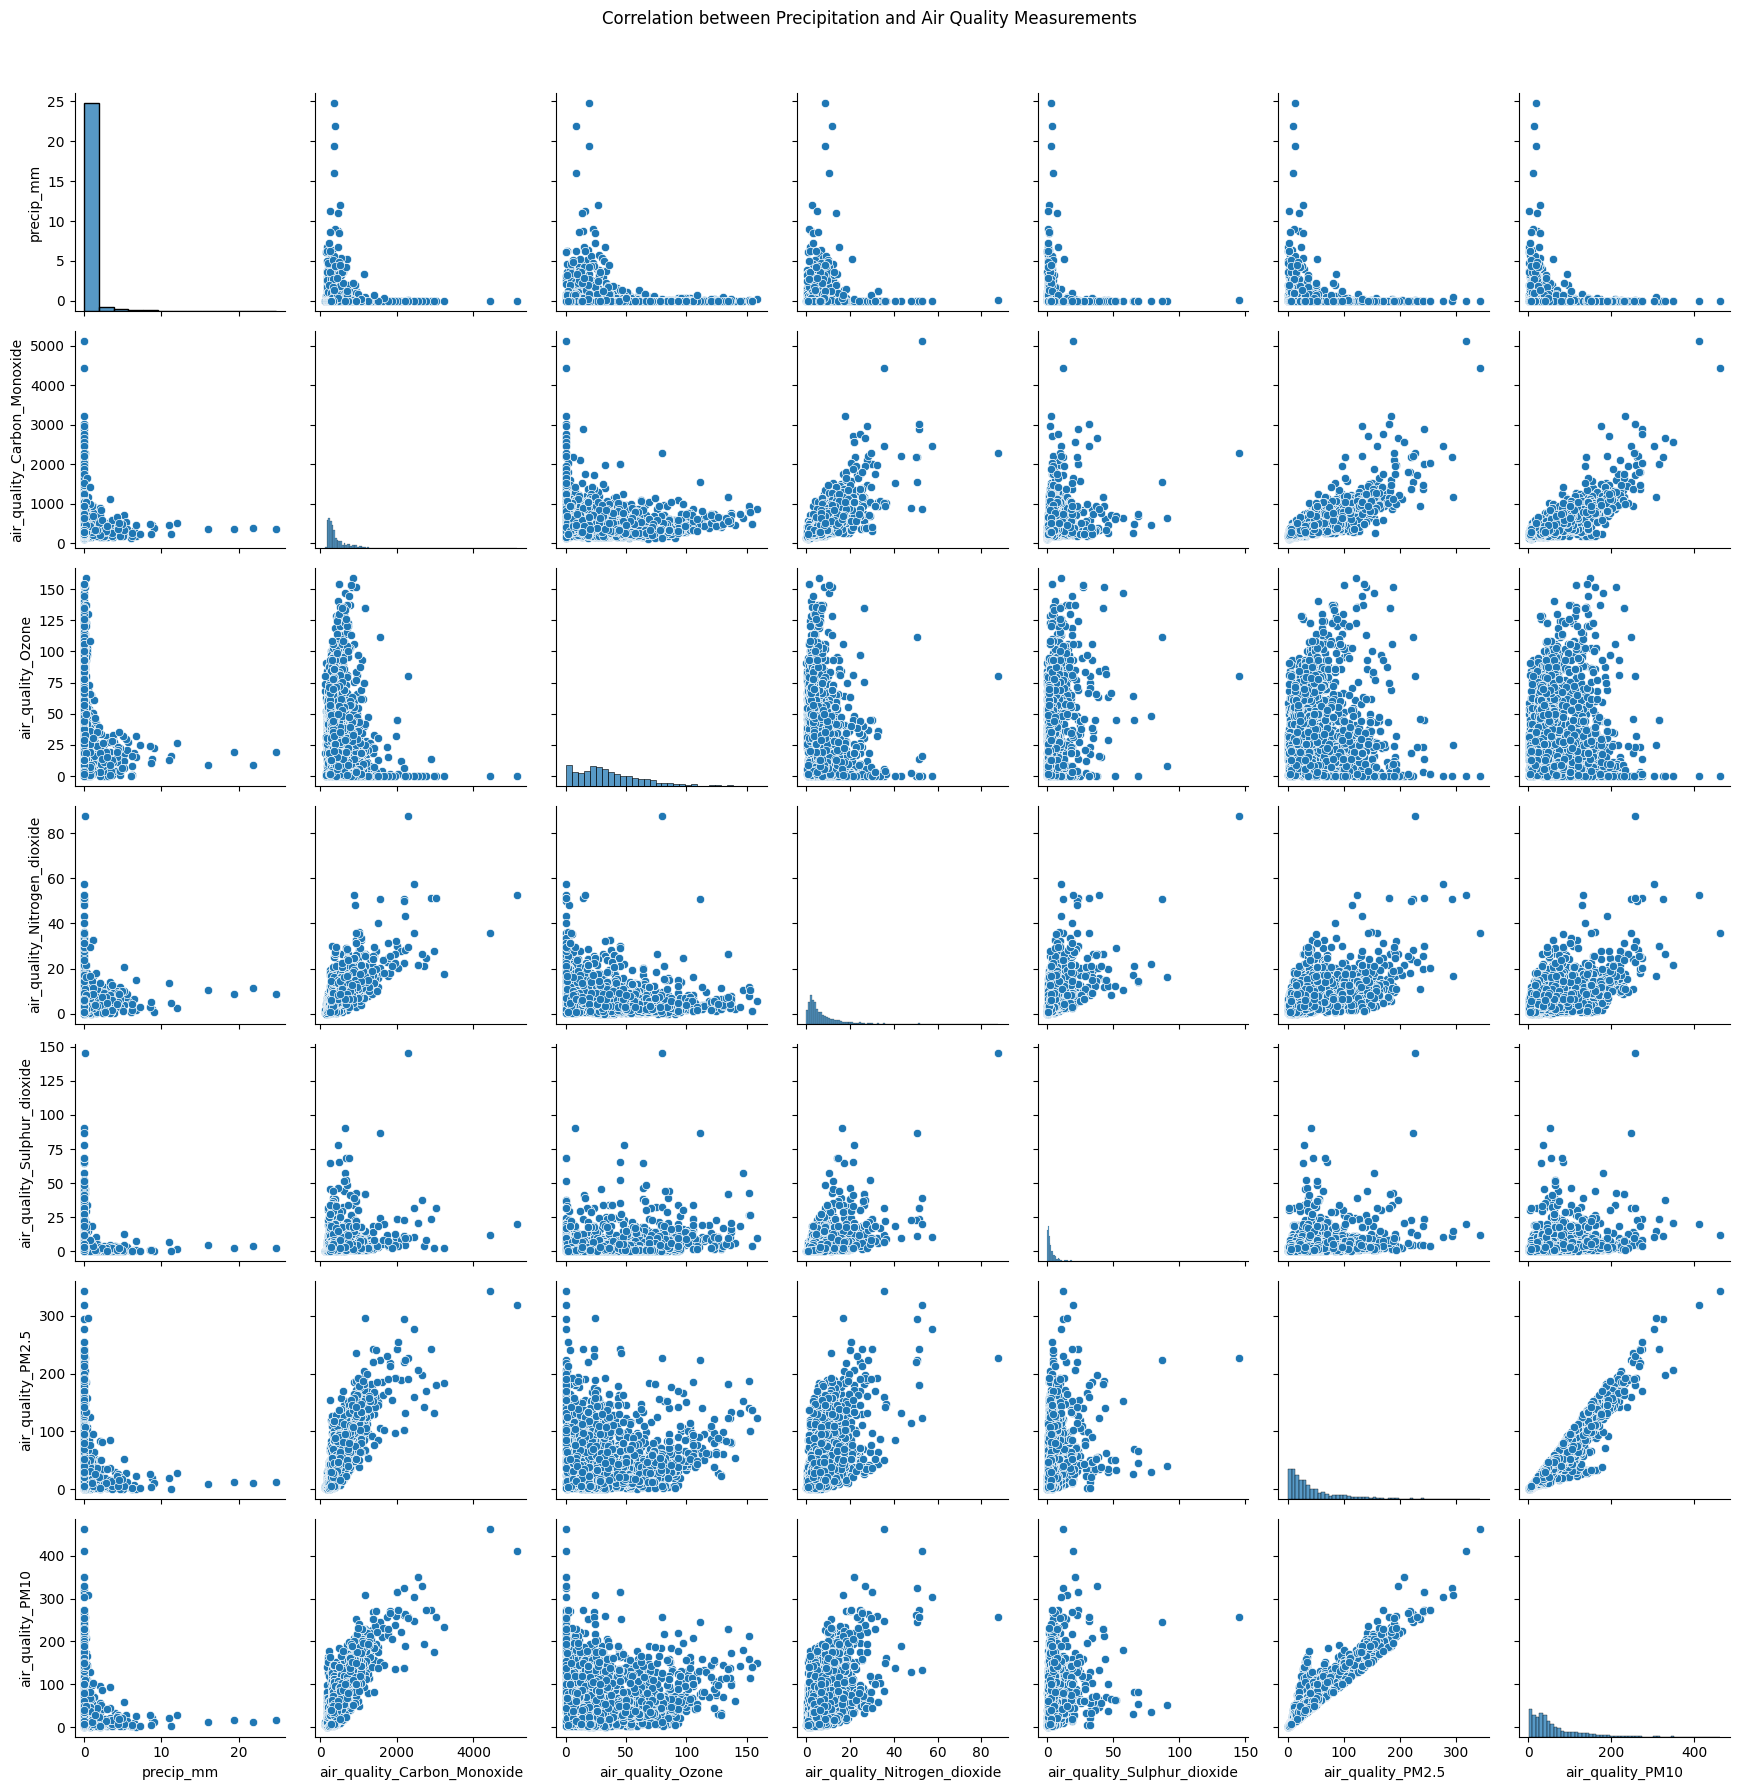

In [25]:
pair_columns = ['precip_mm', 'air_quality_Carbon_Monoxide', 'air_quality_Ozone', 
                'air_quality_Nitrogen_dioxide', 'air_quality_Sulphur_dioxide', 
                'air_quality_PM2.5', 'air_quality_PM10']

plt.figure(figsize=(12, 10))
slb.pairplot(data=df[pair_columns])
plt.suptitle('Correlation between Precipitation and Air Quality Measurements', y=1.02)
plt.tight_layout()
plt.show()

In [31]:
df.head(2)

,country,location_name,region,latitude,longitude,timezone,last_updated_epoch,last_updated,temperature_celsius,temperature_fahrenheit,condition_text,wind_mph,wind_kph,wind_degree,wind_direction,pressure_mb,pressure_in,precip_mm,precip_in,humidity,cloud,feels_like_celsius,feels_like_fahrenheit,visibility_km,visibility_miles,uv_index,gust_mph,gust_kph,air_quality_Carbon_Monoxide,air_quality_Ozone,air_quality_Nitrogen_dioxide,air_quality_Sulphur_dioxide,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,sunrise,sunset,moonrise,moonset,moon_phase,moon_illumination
0,India,Ashoknagar,Madhya Pradesh,24.57,77.72,Asia/Kolkata,1693286100,29-08-2023 10:45,27.5,81.5,Partly cloudy,12.8,20.5,281,WNW,1008,29.77,0.0,0.0,67,26,29.7,85.5,10.0,6,7,14.8,23.8,243.7,45.8,1.7,3.1,12.6,18.5,1,2,5:59 AM,6:41 PM,5:42 PM,3:38 AM,Waxing Gibbous,93
1,India,Raisen,Madhya Pradesh,23.33,77.80,Asia/Kolkata,1693286100,29-08-2023 10:45,27.5,81.5,Sunny,9.6,15.5,287,WNW,1008,29.78,0.0,0.0,70,19,30.0,86.0,10.0,6,7,11.2,18.0,240.3,38.3,2.1,2.6,10.7,14.2,1,1,6:00 AM,6:40 PM,5:39 PM,3:41 AM,Waxing Gibbous,93


### Region Wise Wind Direction Distribution
---------------------------------------------

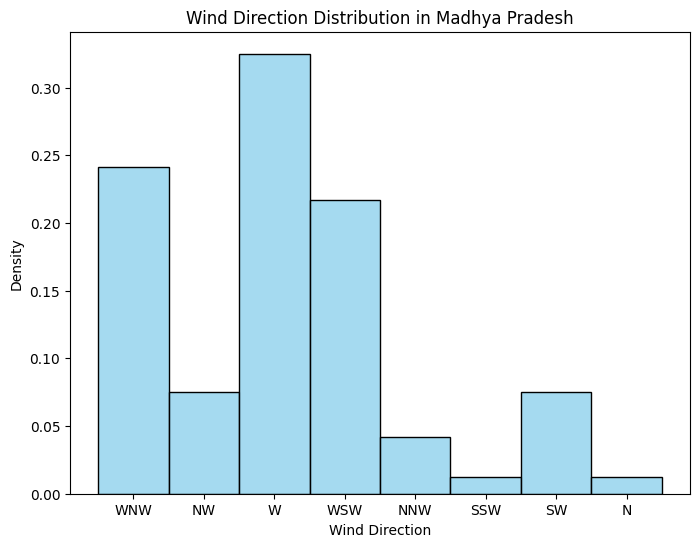

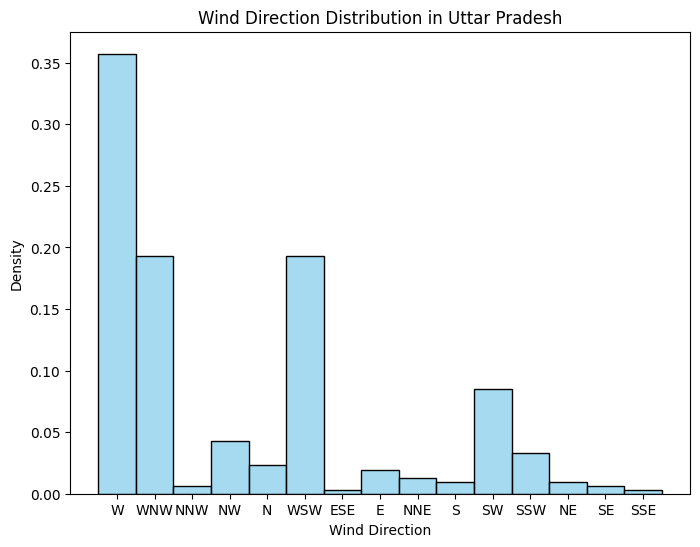

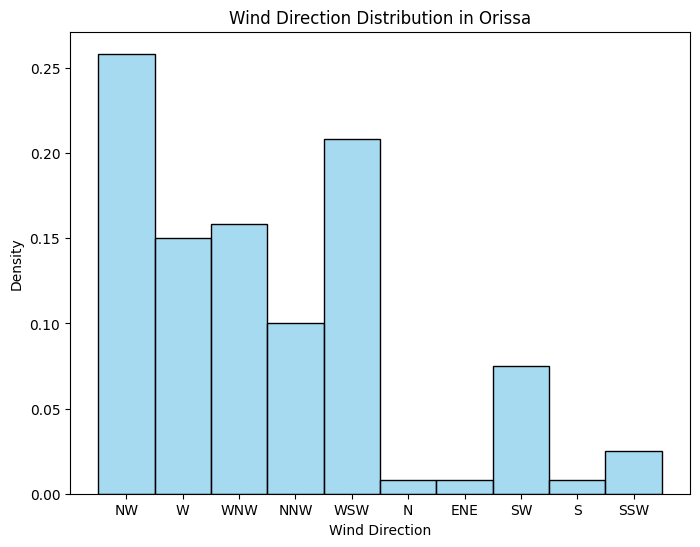

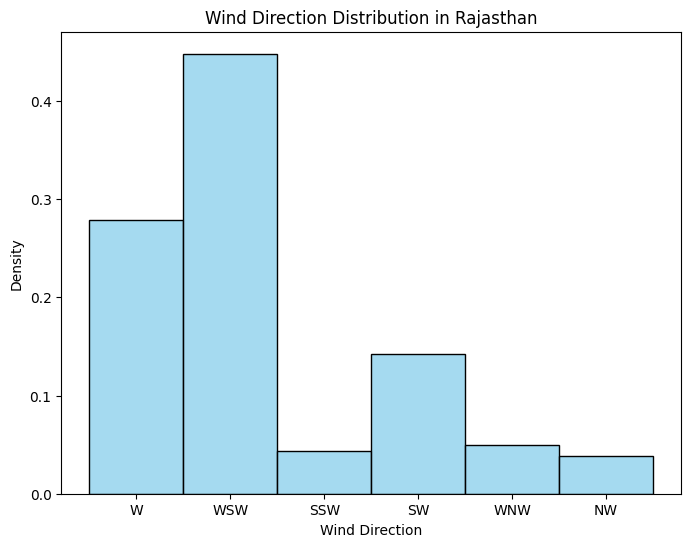

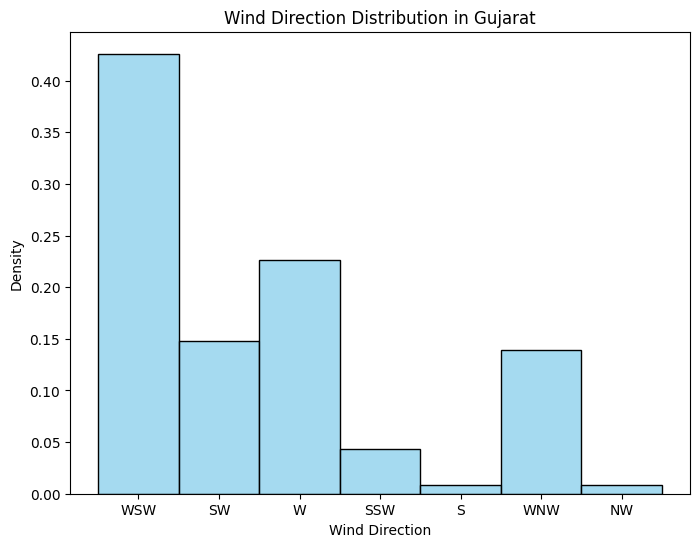

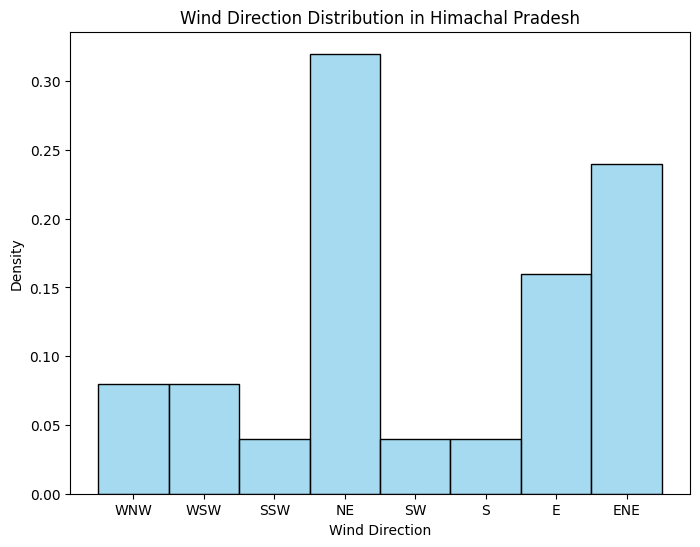

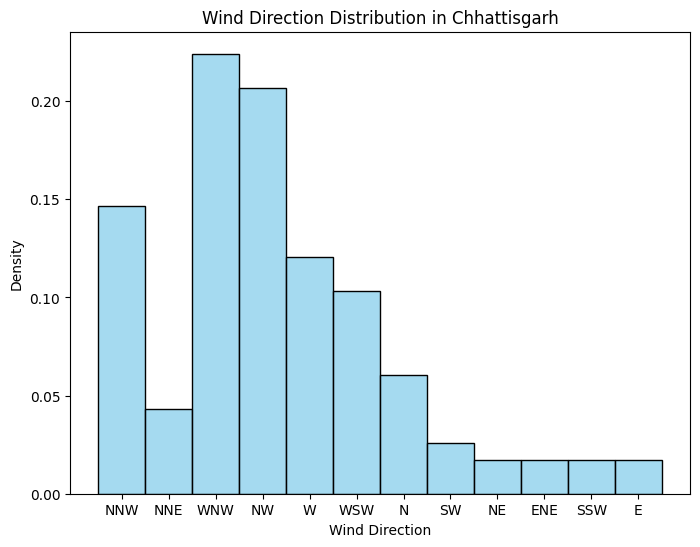

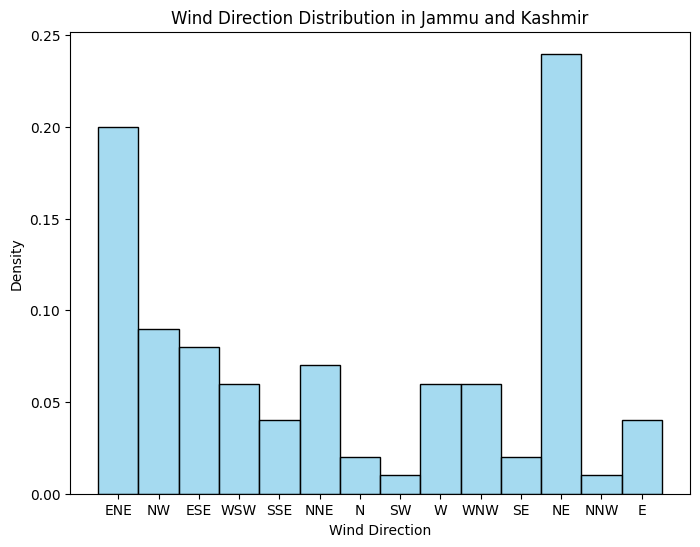

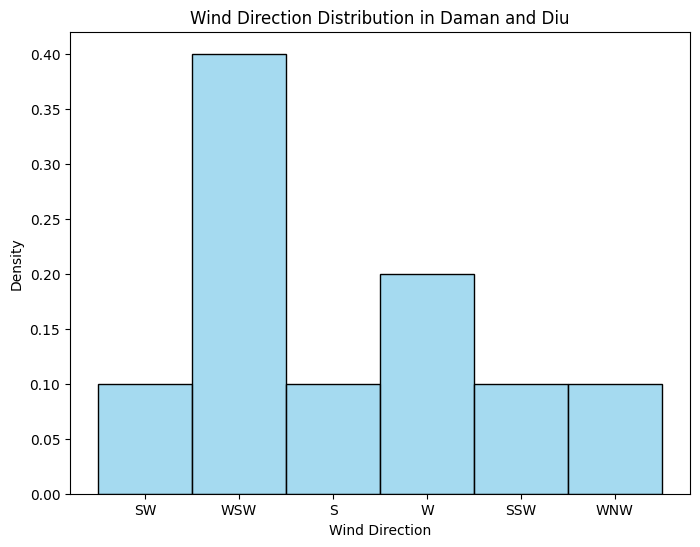

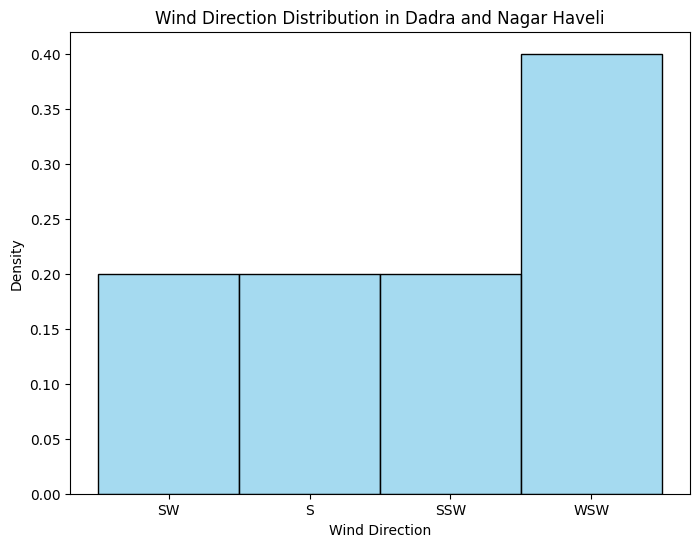

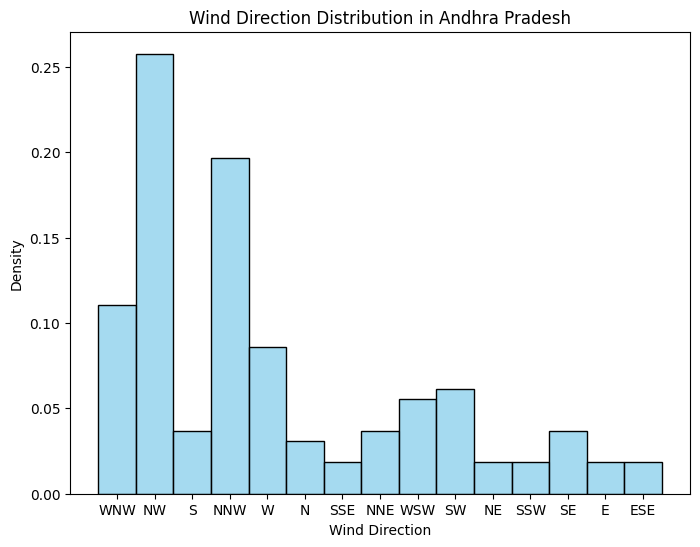

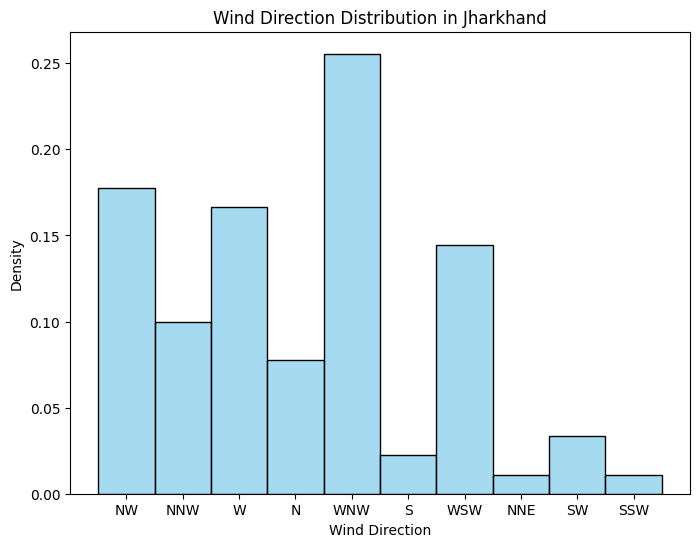

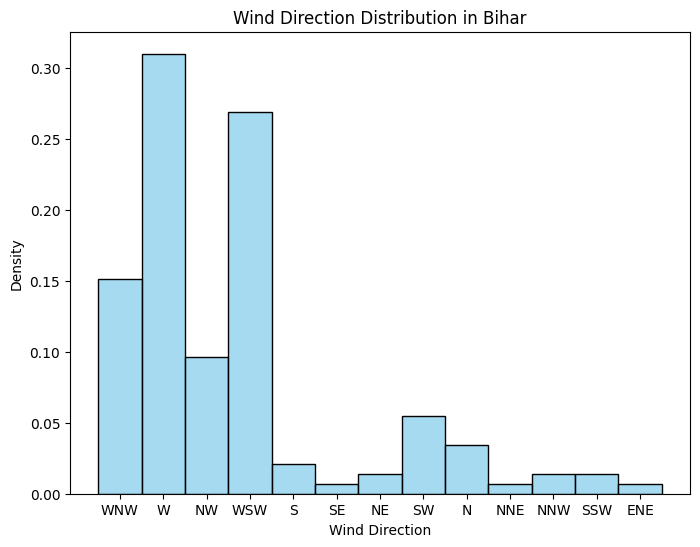

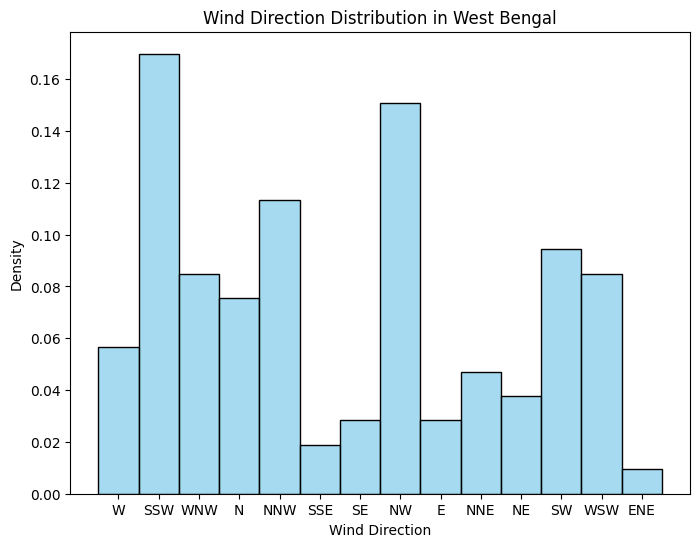

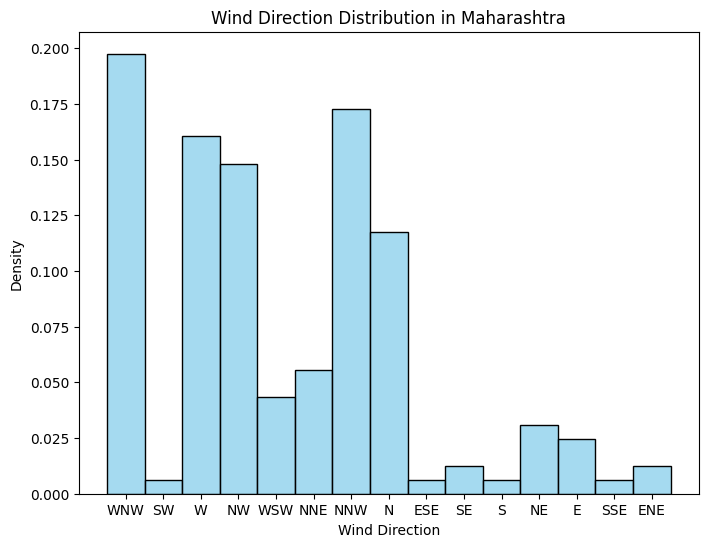

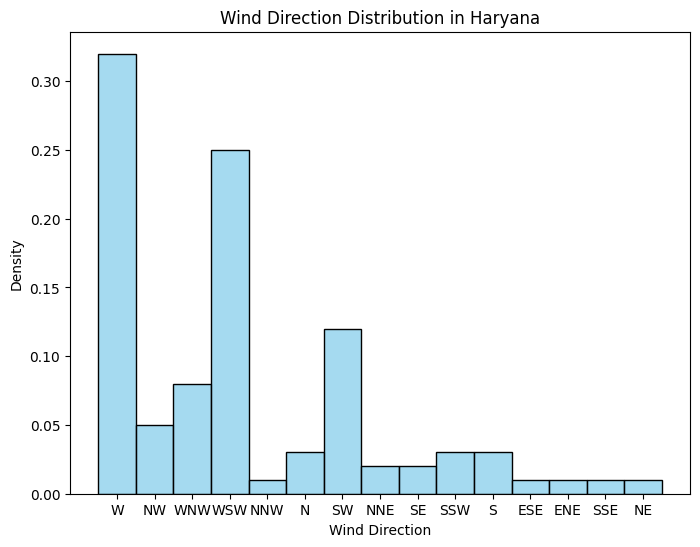

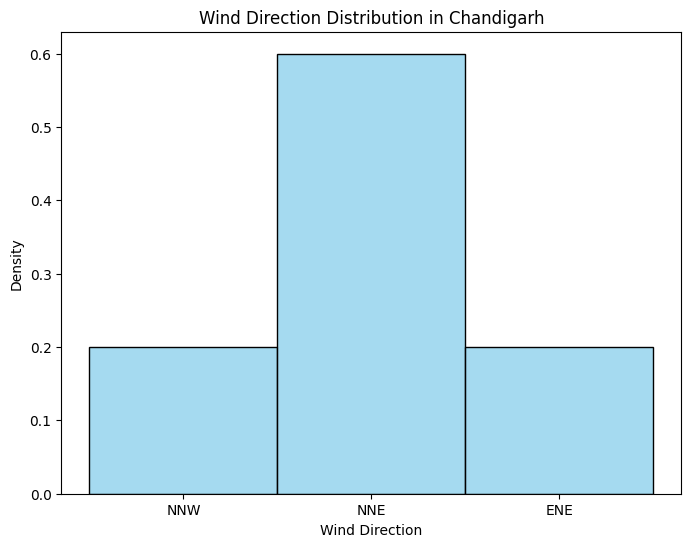

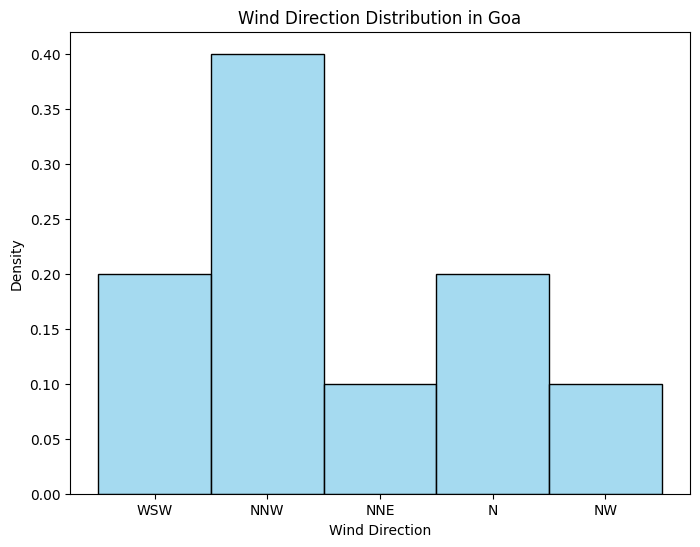

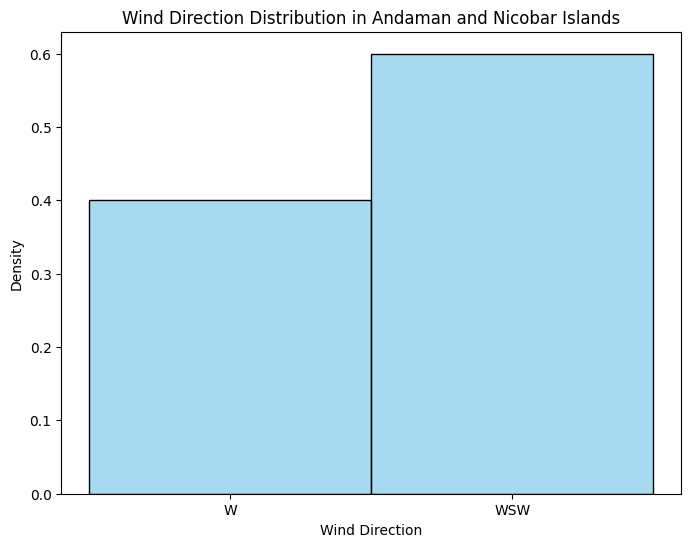

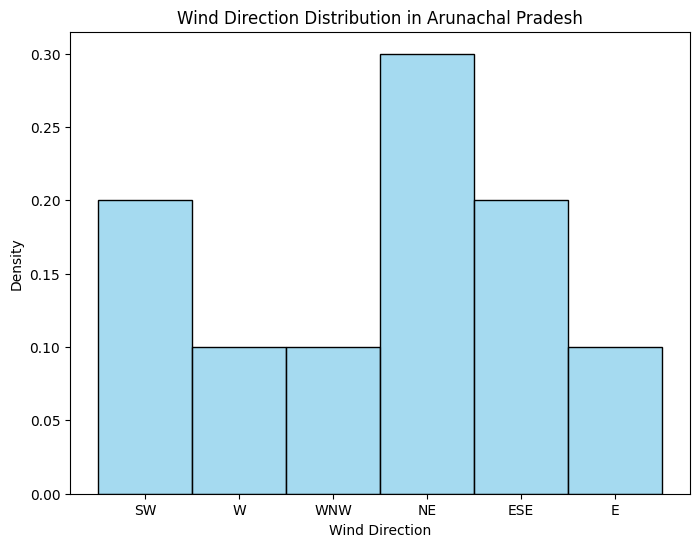

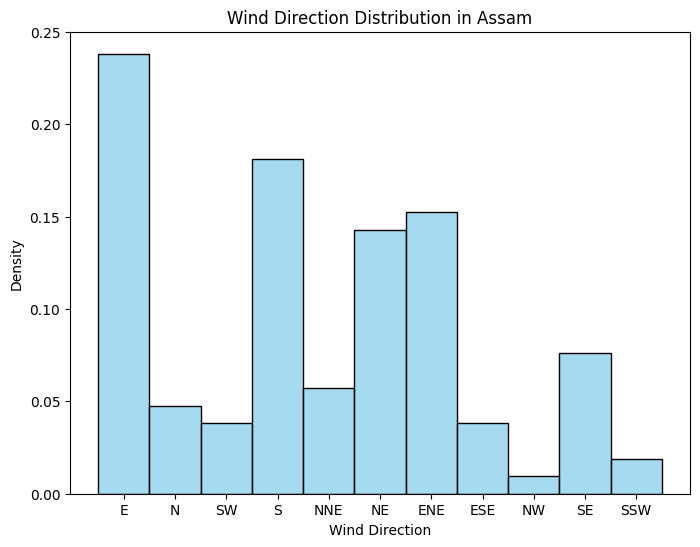

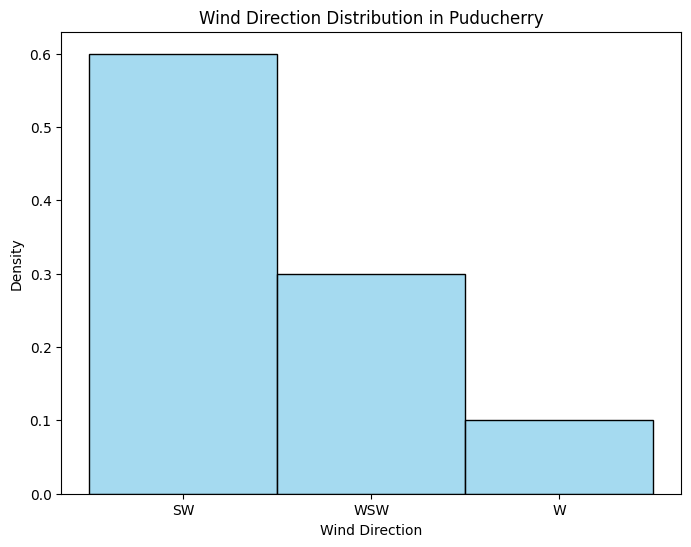

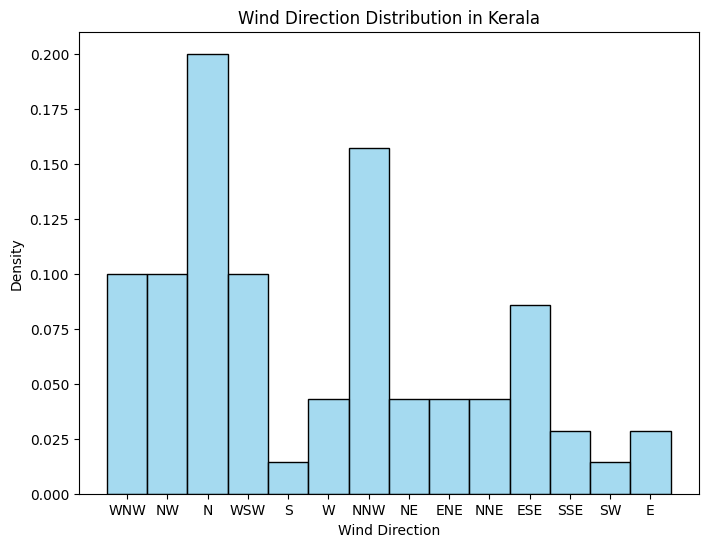

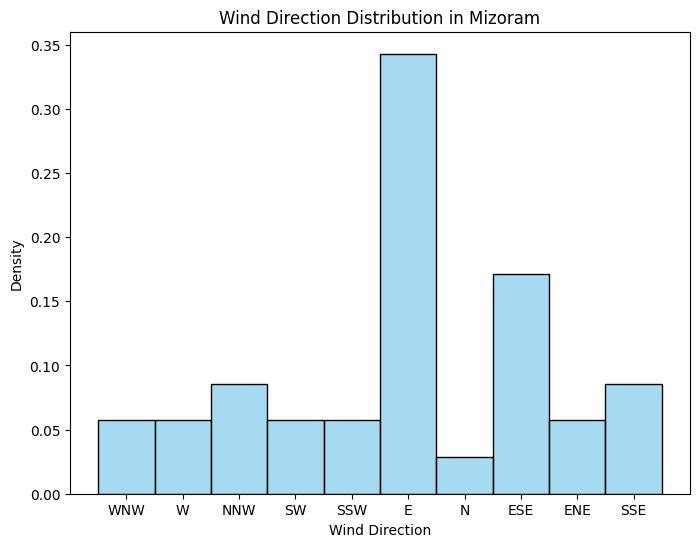

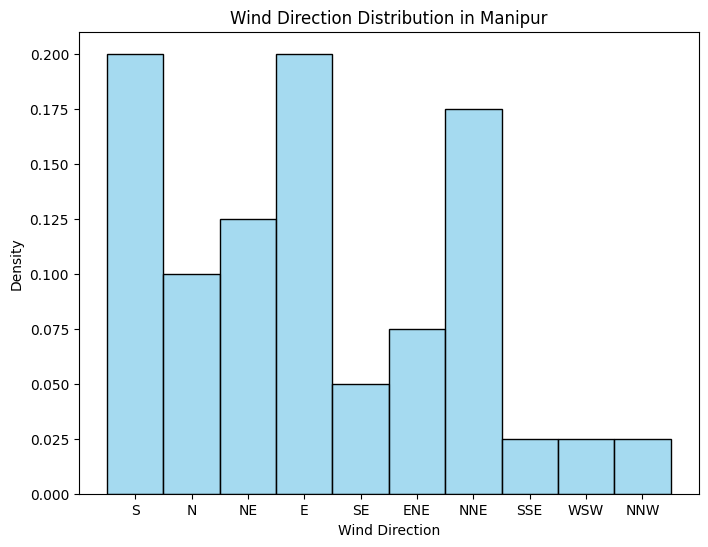

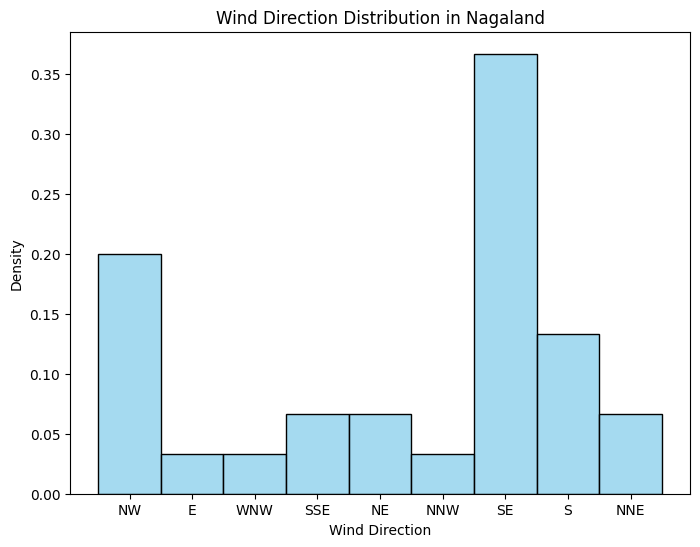

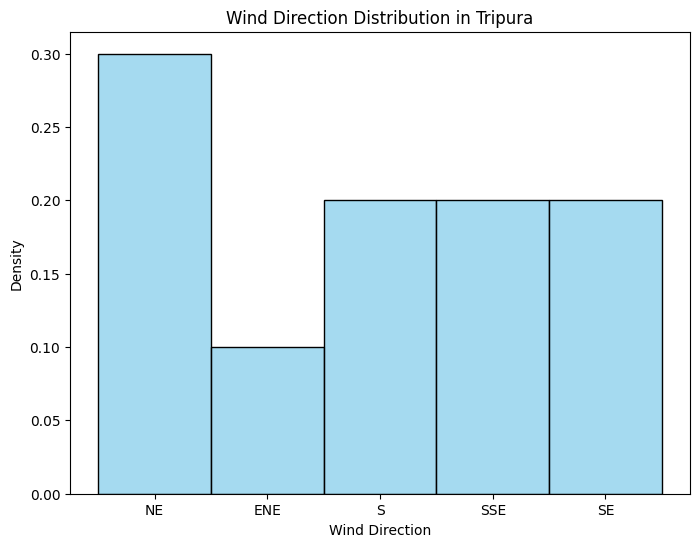

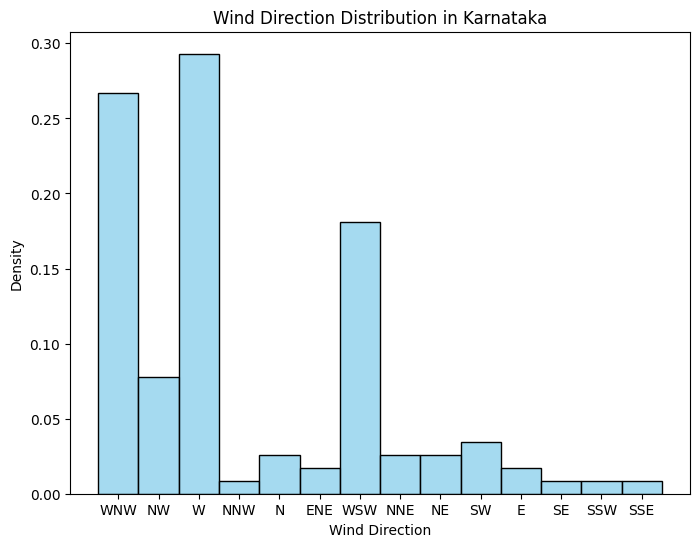

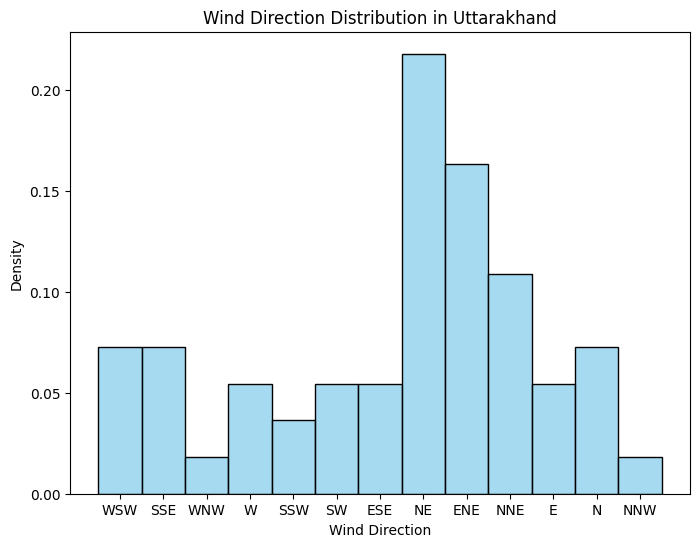

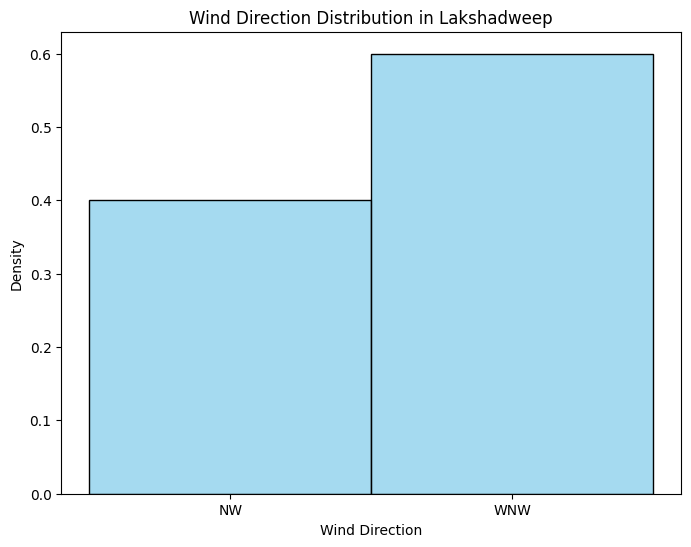

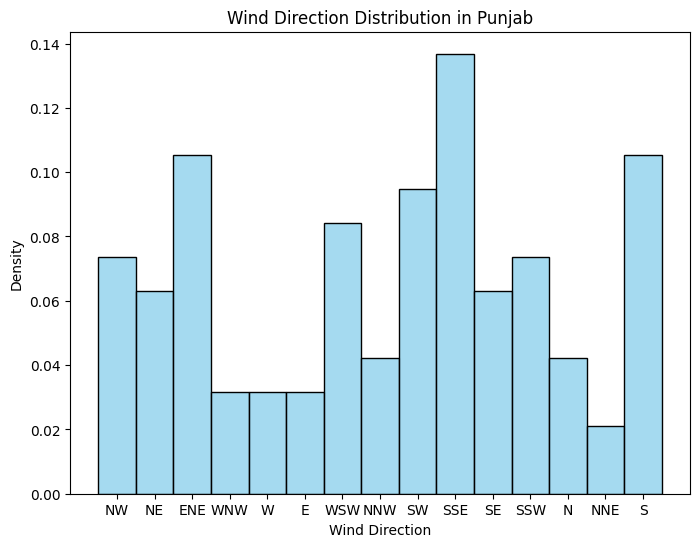

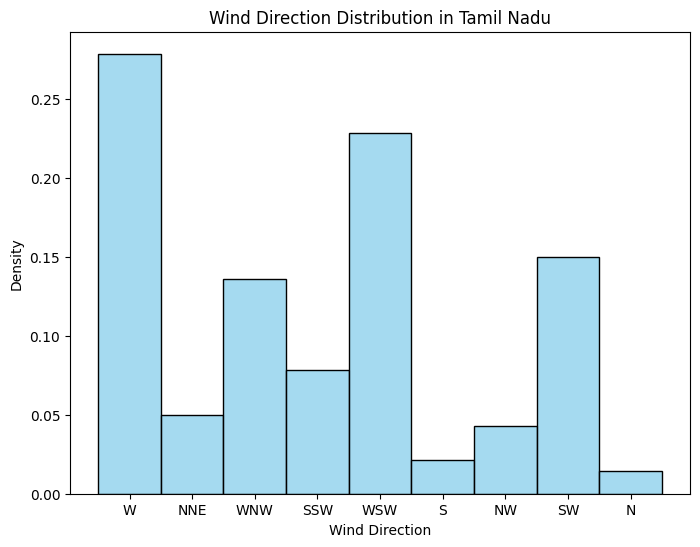

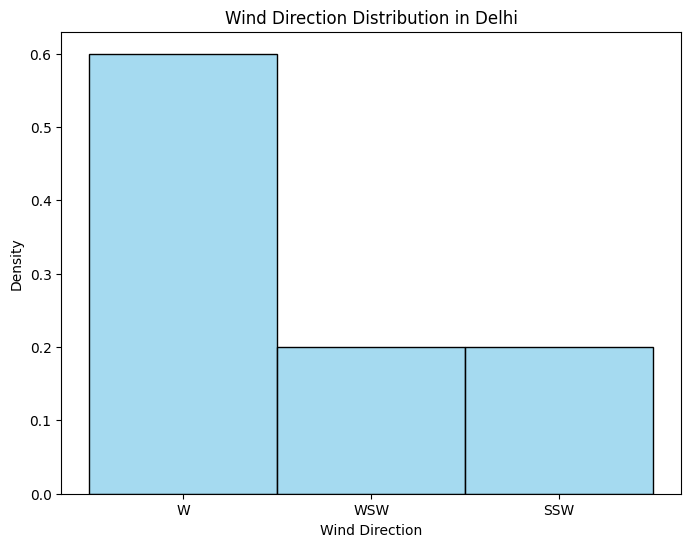

In [76]:
regions=df.region.unique()  # list of unique regions
for region in regions:
    plt.figure(figsize=(8,6))
    data_subset=df[df['region'] == region]
    slb.histplot(data=data_subset,x='wind_direction',
                 bins=16,multiple='stack',stat='density',color='skyblue')
    plt.title(f'Wind Direction Distribution in {region}')
    plt.xlabel('Wind Direction')
    
    plt.show()


### Temperater Variation by Region
-----------------------------------------------------------------------------

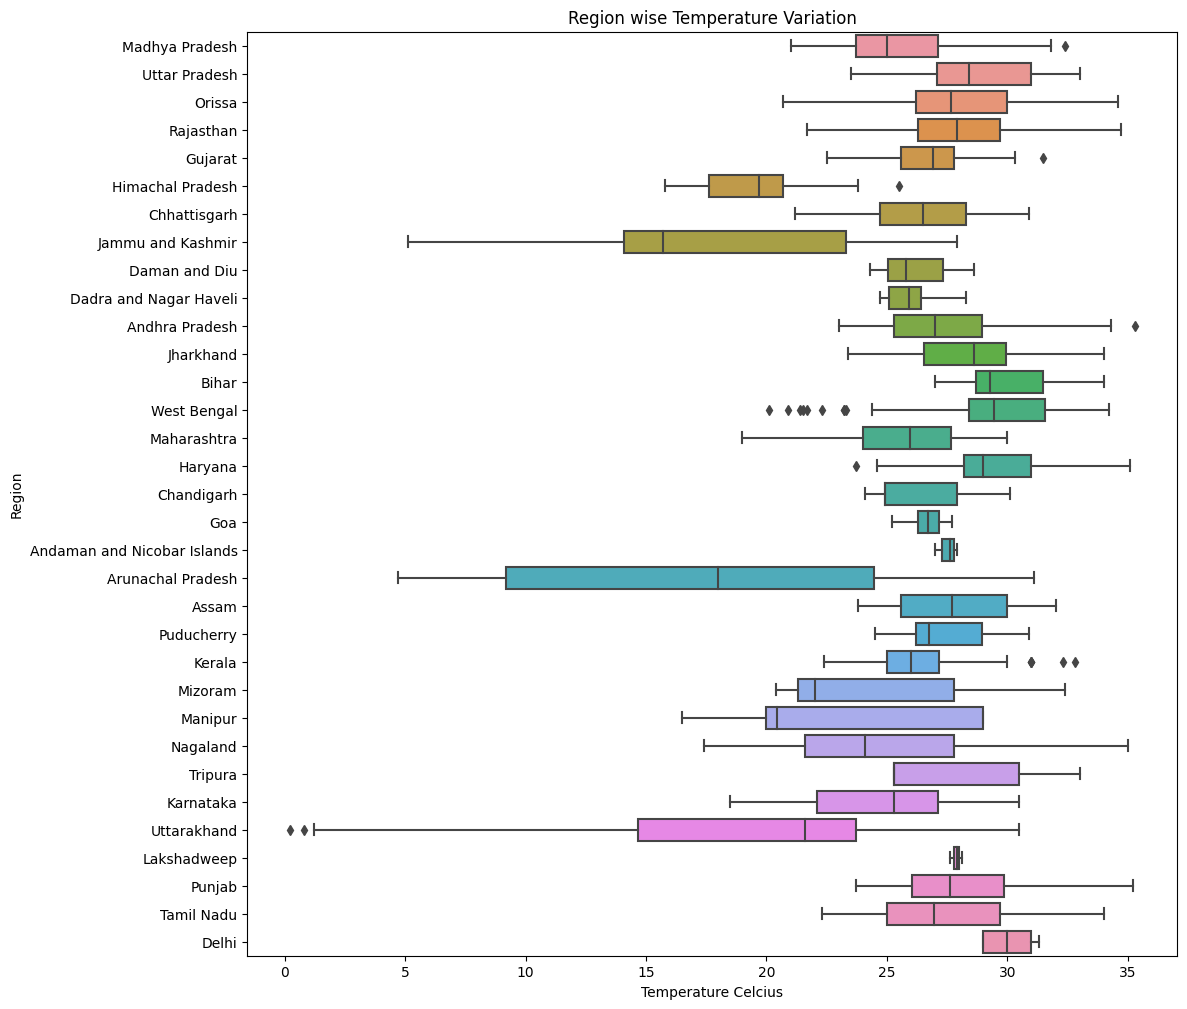

In [68]:
plt.figure(figsize=(12,12))
slb.boxplot(data=df, x='temperature_celsius', y='region')
plt.title('Region wise Temperature Variation')
plt.xlabel('Temperature Celcius')
plt.ylabel('Region')
plt.show()

### Region wise Humidity Comaparison
----------------------------------------------------

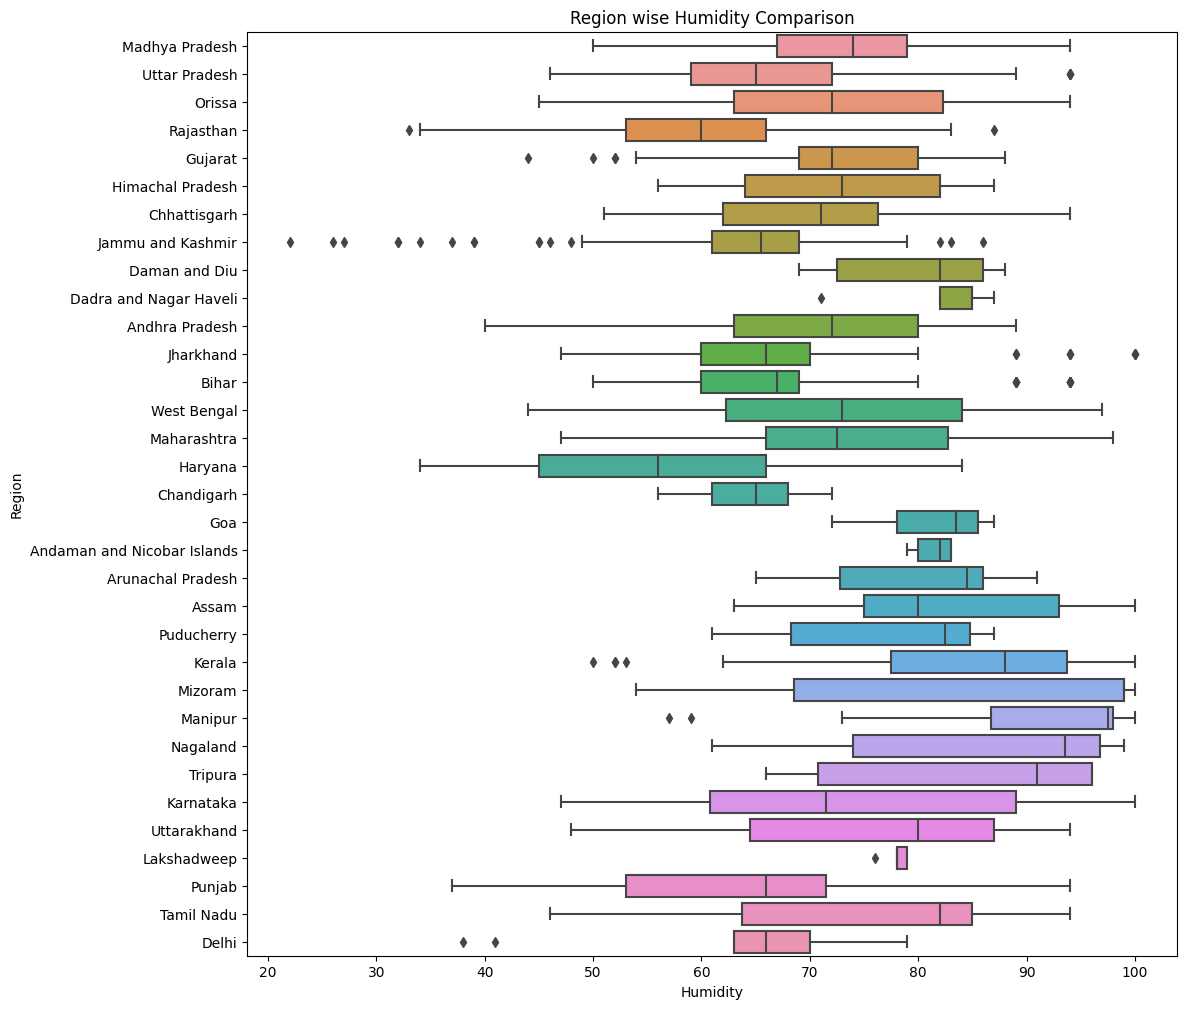

In [72]:
plt.figure(figsize=(12,12))
slb.boxplot(data=df,x='humidity',y='region')
plt.title('Region wise Humidity Comparison')
plt.xlabel('Humidity')
plt.ylabel('Region')
plt.show()